In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

!pip install keras_ocr
import keras_ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 296 kB/s 
     |████████████████████████████████| 619 kB 17.1 MB/s 
     |████████████████████████████████| 965 kB 5.7 MB/s 
     |████████████████████████████████| 9.5 MB 26.5 MB/s 
     |████████████████████████████████| 50 kB 4.0 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=1cf47b7bc2d70334eb30a5b4c762448d9e570a9521ec1571d4bcc1f73447c47f
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


(-0.5, 799.5, 799.5, -0.5)

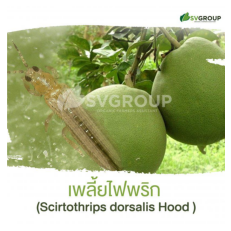

In [3]:
# Put image path in this variable
img_path = "65505.jpg"
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

# New Section

In [7]:
def midpoint(x1, y1, x2, y2):
  x_mid = int((x1 + x2)/2)
  y_mid = int((y1 + y2)/2)
  return x_mid, y_mid

# Main method used for ocr
def keras_ocr_core(filename, pipeline):
  img = keras_ocr.tools.read(filename)
  prediction_groups = pipeline.recognize([img])
  mask = np.zeros(img.shape[:2], dtype="uint8")

  for box in prediction_groups[0]:
    x0, y0 = box[1][0]
    x1, y1 = box[1][1]
    x2, y2 = box[1][2]
    x3, y3 = box[1][3]

    x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
    x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

    thickness = int(math.sqrt((x2 - x1)**2 + (y2 - y1)**2))

    cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,
              thickness)
    img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
  name = filename[:-4]  
  cv2.imwrite(name + '_clean.jpg', img)
  return img

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 4s 4s/step


(-0.5, 799.5, 799.5, -0.5)

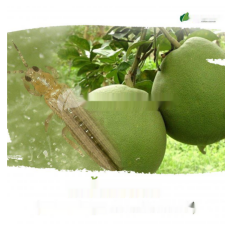

In [8]:
pipeline = keras_ocr.pipeline.Pipeline()
removed = keras_ocr_core(img_path, pipeline)
plt.imshow(removed)
plt.axis('off')